### Clustering Final

##Features criadas para o dataset geral (df)

avg_margin: Average margin of products sold

avg_discount: Average discount applied

avg_shelf_life: Average shelf life of products

avg_time_to_sale: Avg. days it takes to sell products

perc_expiring_sku_mean: Average percentage of expiring stock

total_units_sold: Total units sold per store

avg_profit: Average product profit

num_brands: Number of unique brands sold

num_products: Number of SKUs sold

In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("df.csv")

# Step 1: Aggregate store-level features
store_df = df.groupby('idstore').agg({
    'margin': 'mean',
    'discount': 'mean',
    'profit': 'mean',
    'shelf_life': 'mean',
    'time_to_sale': 'mean',
    'perc_expiring_sku': 'mean',
    'sold': 'sum',
    'brand': pd.Series.nunique,
    'sku': pd.Series.nunique,
    'selling_square_ft': 'mean'
}).reset_index()

store_df.columns = [
    'idstore', 'avg_margin', 'avg_discount', 'avg_profit', 'avg_shelf_life',
    'avg_time_to_sale', 'avg_perc_expiring_sku', 'total_units_sold',
    'num_brands', 'num_products', 'avg_selling_square_ft'
]

# Add district information
districts = df[['idstore', 'district']].drop_duplicates()
store_df = store_df.merge(districts, on='idstore', how='left')
store_df = pd.get_dummies(store_df, columns=['district'], drop_first=True)

print(store_df.head())
store_df.info()

     idstore  avg_margin  avg_discount  avg_profit  avg_shelf_life  \
0    Store 1    0.150249      0.342578    0.149401        1.717256   
1   Store 10    0.155974      0.275189    0.176522        1.681686   
2  Store 100    0.155000      0.300196    0.218502        1.862745   
3  Store 101    0.159884      0.316583    0.196361        2.339768   
4  Store 102    0.160645      0.301039    0.214096        1.487455   

   avg_time_to_sale  avg_perc_expiring_sku  total_units_sold  num_brands  \
0          0.767152               0.446587               345           6   
1          0.389535               0.468796               244          11   
2          0.705882               0.537663               107           8   
3          0.872587               0.407940               275           5   
4          0.301075               0.445878               115           9   

   num_products  ...  district_Leiria  district_Lisboa  district_Portalegre  \
0            21  ...            False      

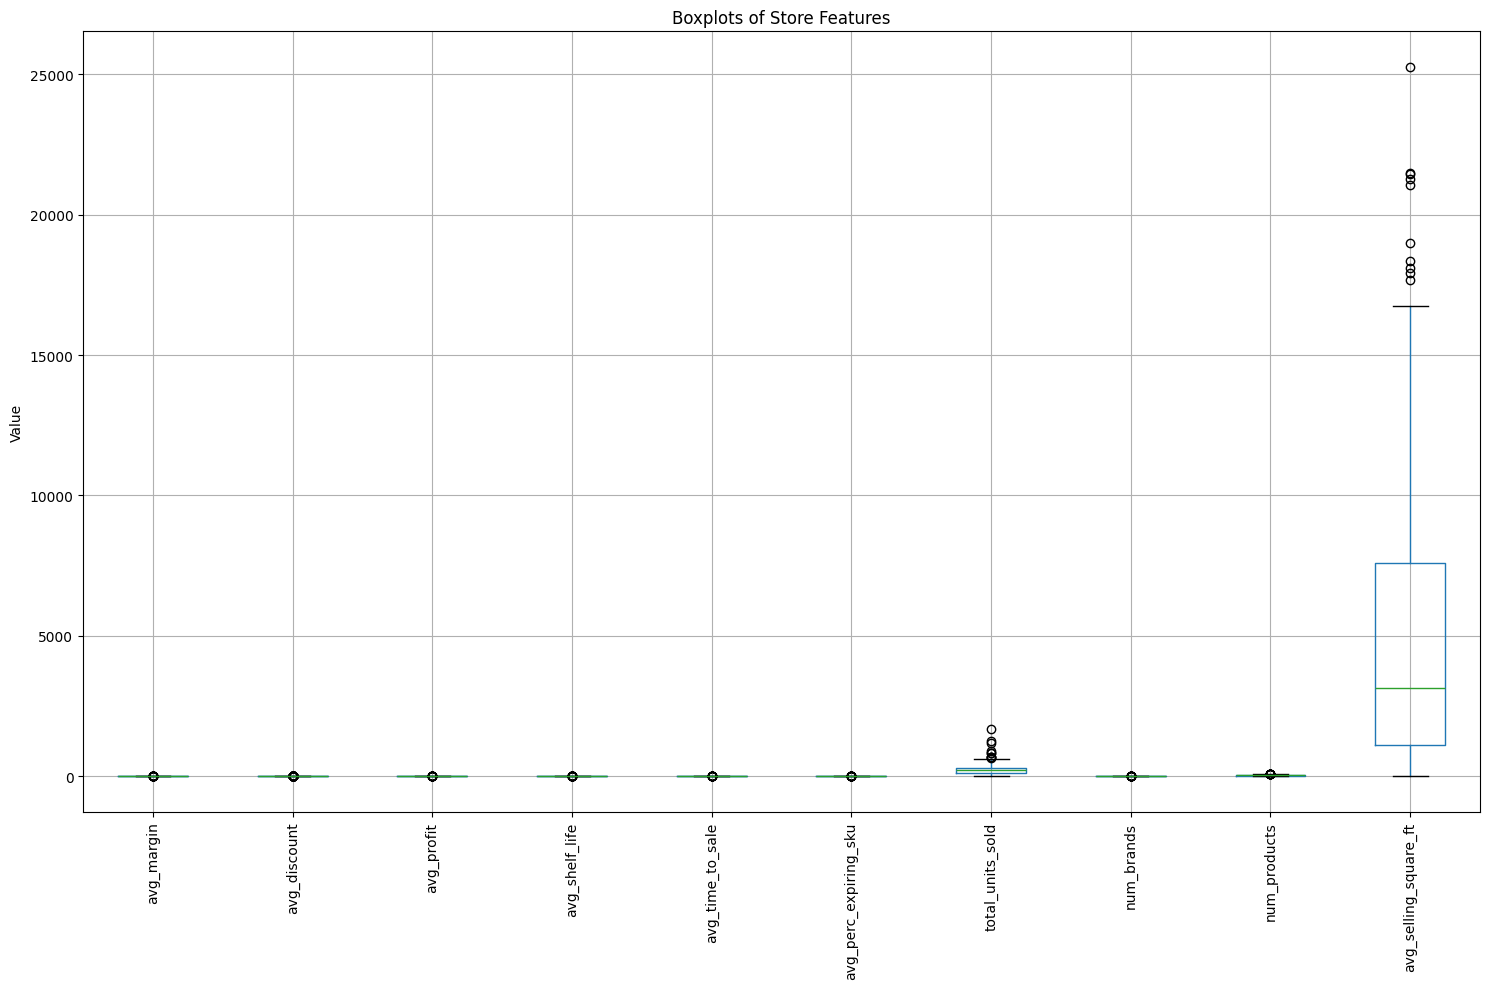

In [45]:
# Create boxplots for all numerical features except avg_selling_square_ft
numerical_cols = store_df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
store_df[numerical_cols].boxplot(rot=90)
plt.title('Boxplots of Store Features')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

- avg_selling_square_ft é uma feature que está a distorcer em escala: é para ser retirada.

In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("df.csv")

# Step 1: Aggregate store-level features
store_df_2 = df.groupby('idstore').agg({
    'margin': 'mean',
    'discount': 'mean',
    'profit': 'mean',
    'shelf_life': 'mean',
    'time_to_sale': 'mean',
    'perc_expiring_sku': 'mean',
    'sold': 'sum',
    'brand': pd.Series.nunique,
    'sku': pd.Series.nunique,
}).reset_index()

store_df_2.columns = [
    'idstore', 'avg_margin', 'avg_discount', 'avg_profit', 'avg_shelf_life',
    'avg_time_to_sale', 'avg_perc_expiring_sku', 'total_units_sold',
    'num_brands', 'num_products'
]

# Add district information
districts = df[['idstore', 'district']].drop_duplicates()
store_df_2 = store_df_2.merge(districts, on='idstore', how='left')
store_df_2 = pd.get_dummies(store_df_2, columns=['district'], drop_first=True)

print(store_df_2.head())
store_df_2.info()

     idstore  avg_margin  avg_discount  avg_profit  avg_shelf_life  \
0    Store 1    0.150249      0.342578    0.149401        1.717256   
1   Store 10    0.155974      0.275189    0.176522        1.681686   
2  Store 100    0.155000      0.300196    0.218502        1.862745   
3  Store 101    0.159884      0.316583    0.196361        2.339768   
4  Store 102    0.160645      0.301039    0.214096        1.487455   

   avg_time_to_sale  avg_perc_expiring_sku  total_units_sold  num_brands  \
0          0.767152               0.446587               345           6   
1          0.389535               0.468796               244          11   
2          0.705882               0.537663               107           8   
3          0.872587               0.407940               275           5   
4          0.301075               0.445878               115           9   

   num_products  ...  district_Leiria  district_Lisboa  district_Portalegre  \
0            21  ...            False      

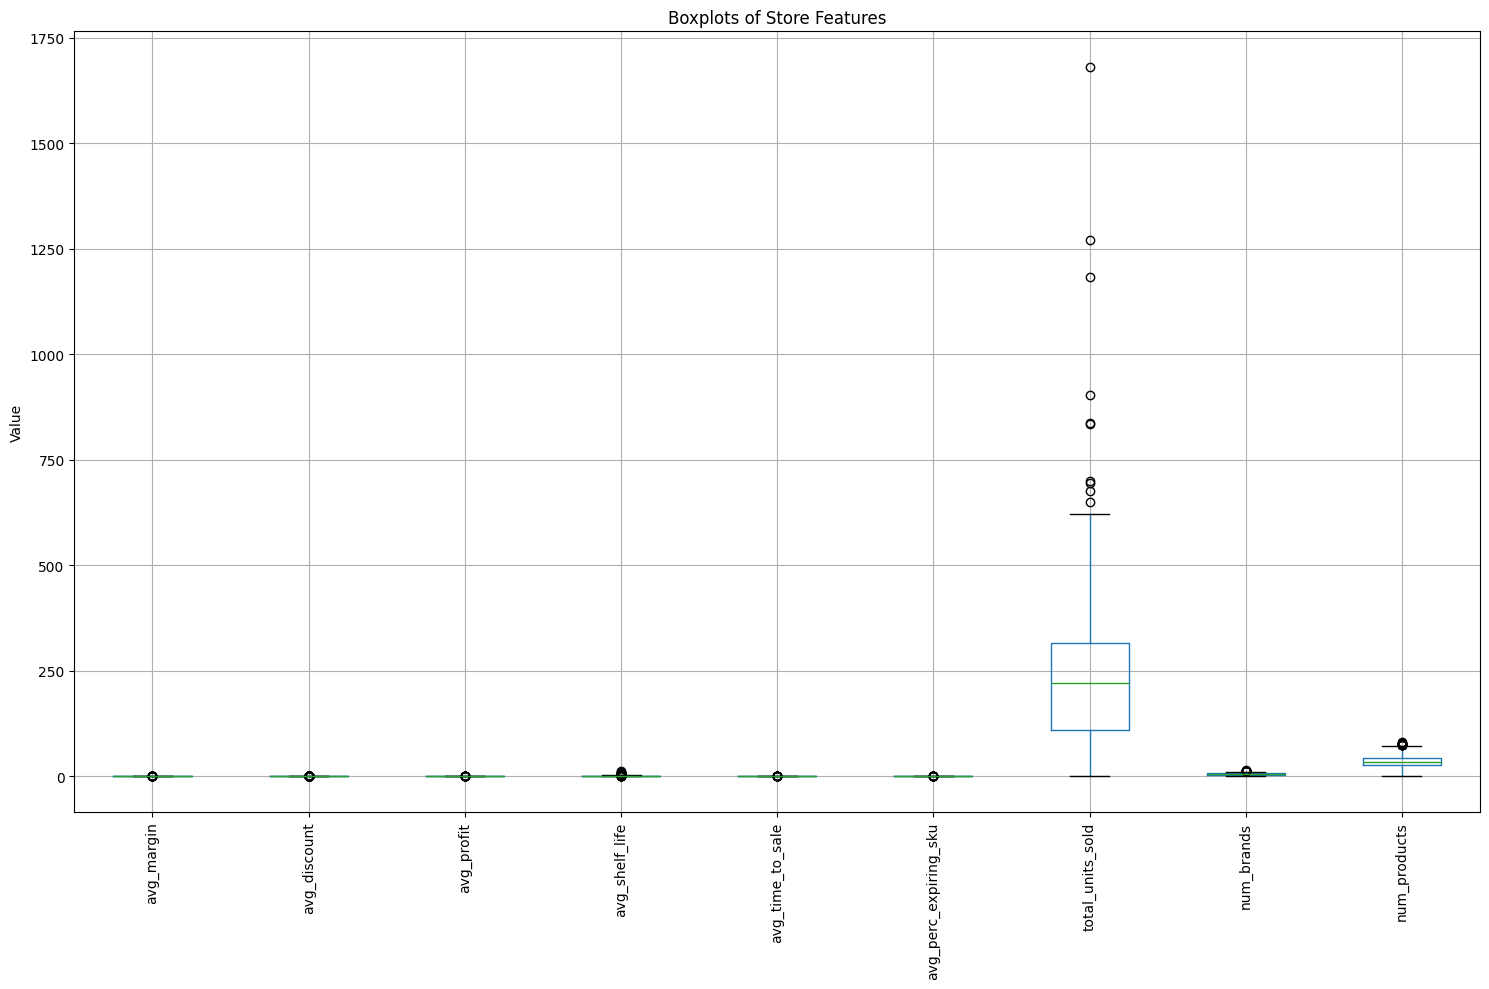

In [47]:
# Create boxplots for all numerical features except avg_selling_square_ft
numerical_cols = store_df_2.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
store_df_2[numerical_cols].boxplot(rot=90)
plt.title('Boxplots of Store Features')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

- continuo com problemas de escala: optar por apenas 4 features

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("df.csv")

# Step 1: Aggregate store-level features
store_df_3 = df.groupby('idstore').agg({
    'discount': 'mean',
    'shelf_life': 'mean',
    'time_to_sale': 'mean',
    'brand': pd.Series.nunique,
}).reset_index()

store_df_3.columns = [
    'idstore', 'avg_shelf_life', 'avg_discount',
    'avg_time_to_sale', 'num_brands'
]

# Add district information
districts = df[['idstore', 'district']].drop_duplicates()
store_df_3 = store_df_3.merge(districts, on='idstore', how='left')
store_df_3 = pd.get_dummies(store_df_3, columns=['district'], drop_first=True)

print(store_df_3.head())
store_df_3.info()

     idstore  avg_shelf_life  avg_discount  avg_time_to_sale  num_brands  \
0    Store 1        0.342578      1.717256          0.767152           6   
1   Store 10        0.275189      1.681686          0.389535          11   
2  Store 100        0.300196      1.862745          0.705882           8   
3  Store 101        0.316583      2.339768          0.872587           5   
4  Store 102        0.301039      1.487455          0.301075           9   

   district_Beja  district_Braga  district_Bragança  district_Castelo Branco  \
0          False           False              False                    False   
1          False           False              False                    False   
2          False           False              False                    False   
3          False           False              False                    False   
4          False           False              False                    False   

   district_Coimbra  ...  district_Leiria  district_Lisboa  \


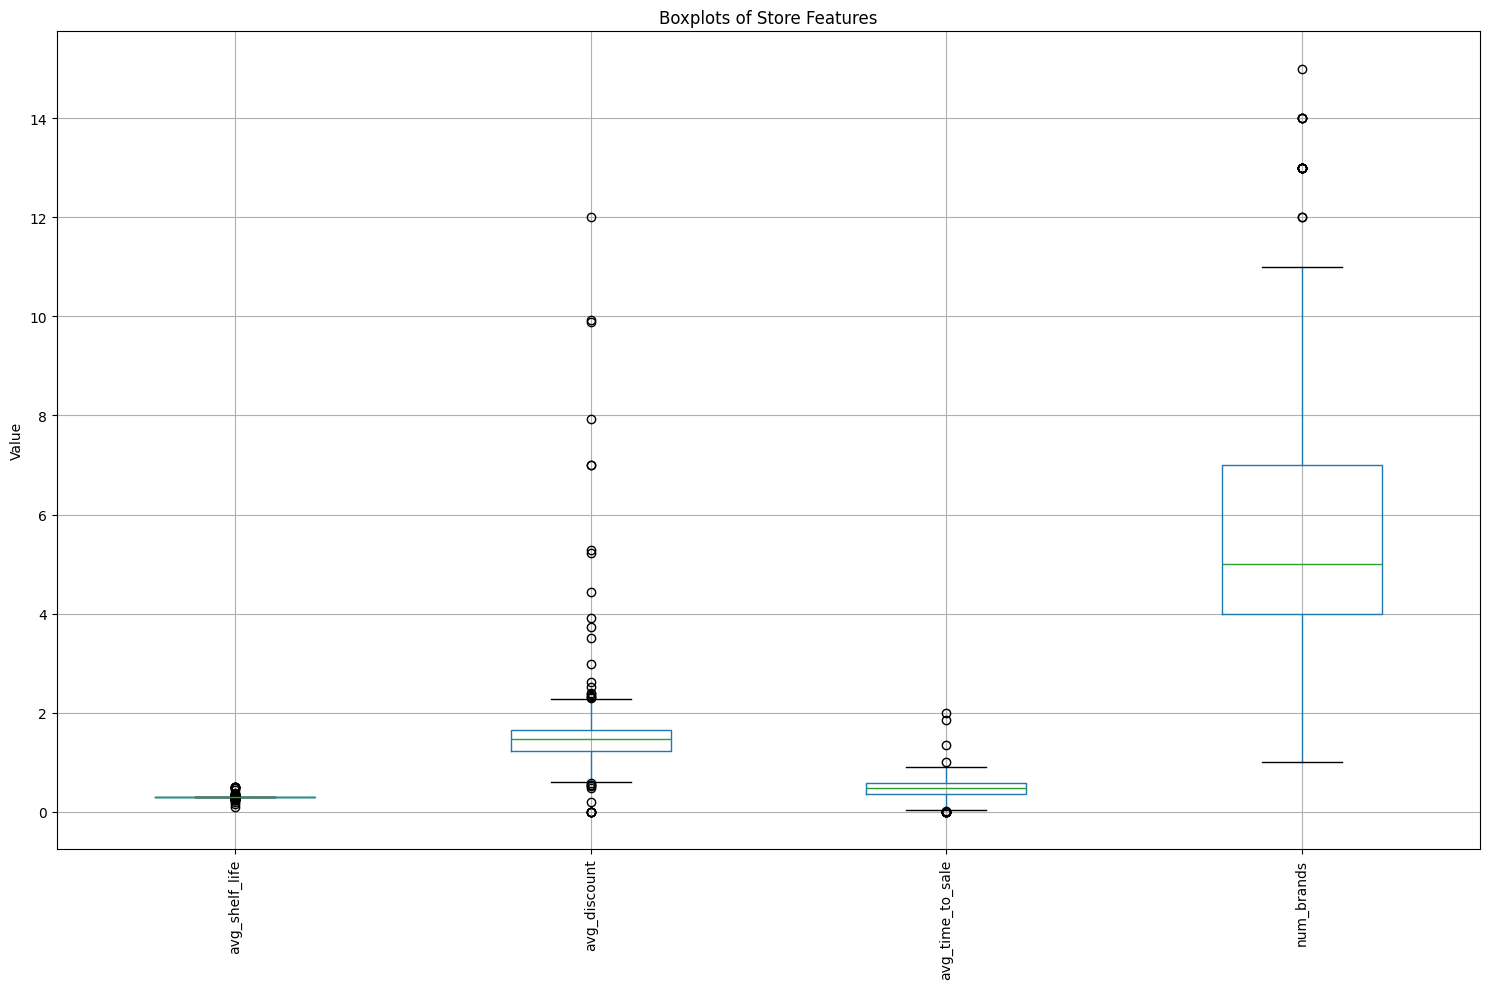

In [29]:
# Create boxplots for all numerical features except avg_selling_square_ft
numerical_cols = store_df_3.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
store_df[numerical_cols].boxplot(rot=90)
plt.title('Boxplots of Store Features')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

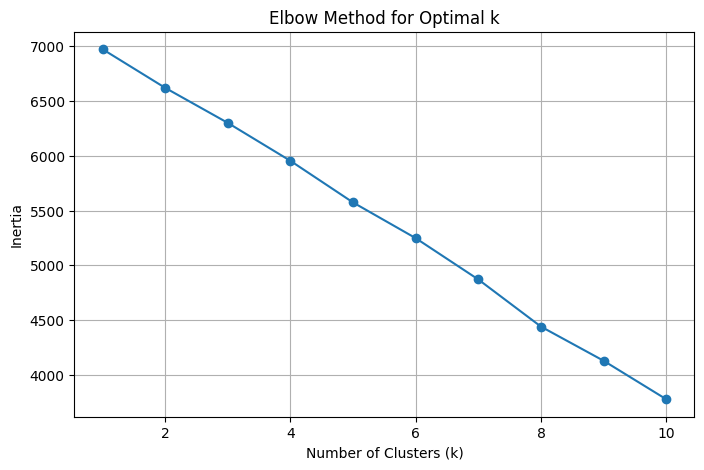

In [30]:
# Step 2: Scale the features
X = store_df_3.drop(columns=['idstore'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to choose optimal k
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

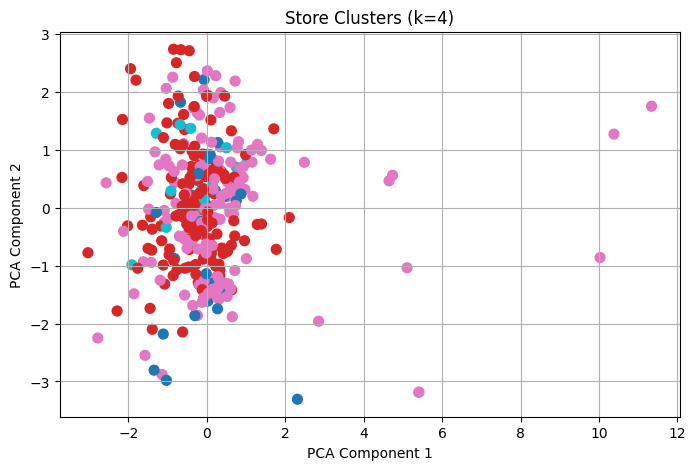

In [31]:
# Step 3: Cluster using KMeans
k = 4  # or any number of clusters you choose
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add clusters back to the dataframe
store_df_3['cluster'] = clusters

# Step 4: Visualize with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', s=50)
plt.title(f'Store Clusters (k={k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

- Não faz sentido. Poderá não fazer sentido entrar com médias. Vamos tentar fazer o cluster com as features originais.

In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load dataset
df_4 = pd.read_csv("df.csv")

# Select relevant features for clustering (from original, non-aggregated data)
features = [
    'margin', 'discount', 'profit', 'shelf_life', 'time_to_sale',
    'perc_expiring_sku', 'sold'
]

# Add one-hot encoded 'district'
df_4 = pd.get_dummies(df_4, columns=['district'], drop_first=True)

# Filter the feature set (including new dummies)
feature_cols = features + [col for col in df_4.columns if col.startswith("district_")]
X = df_4[feature_cols].copy()

df_4.head()
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150048 entries, 0 to 150047
Data columns (total 37 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   idstore                    150048 non-null  object 
 1   sku                        150048 non-null  object 
 2   brand                      150048 non-null  object 
 3   weight                     150048 non-null  int64  
 4   oldpvp                     150048 non-null  float64
 5   newpvp                     150048 non-null  float64
 6   discount                   150048 non-null  float64
 7   margin                     150048 non-null  float64
 8   profit                     150048 non-null  float64
 9   payment_method             80505 non-null   object 
 10  labelling_date             150048 non-null  object 
 11  expiring_date              150048 non-null  object 
 12  sell_date                  80505 non-null   object 
 13  shelf_life                 15

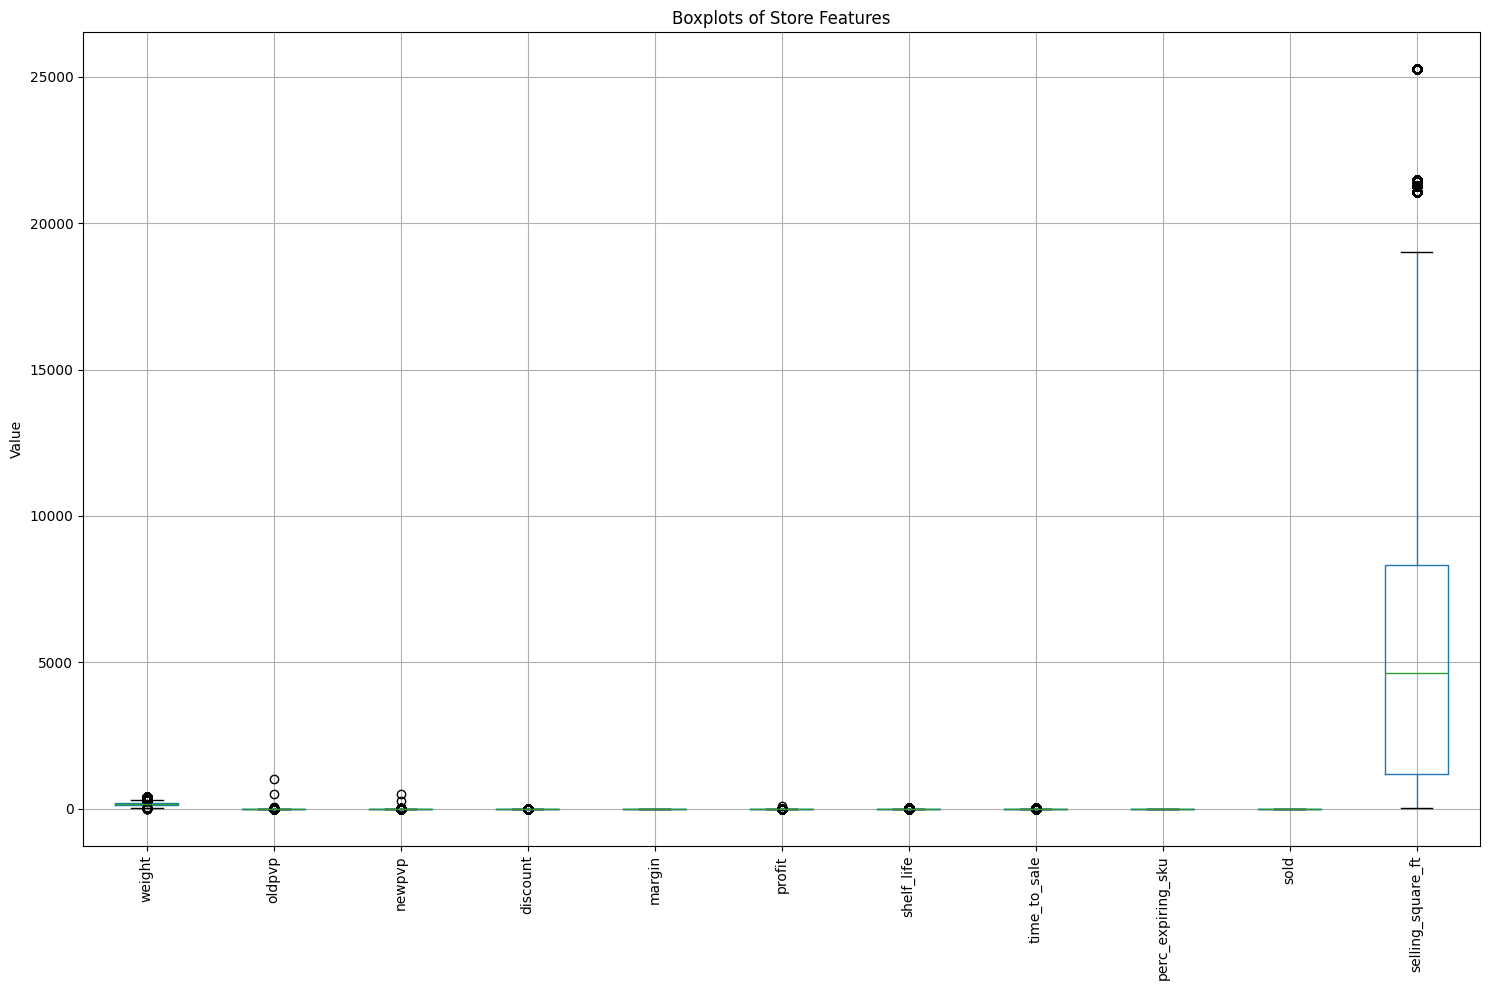

In [51]:
# Create boxplots for all numerical features except avg_selling_square_ft
numerical_cols = df_4.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
df_4[numerical_cols].boxplot(rot=90)
plt.title('Boxplots of Store Features')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

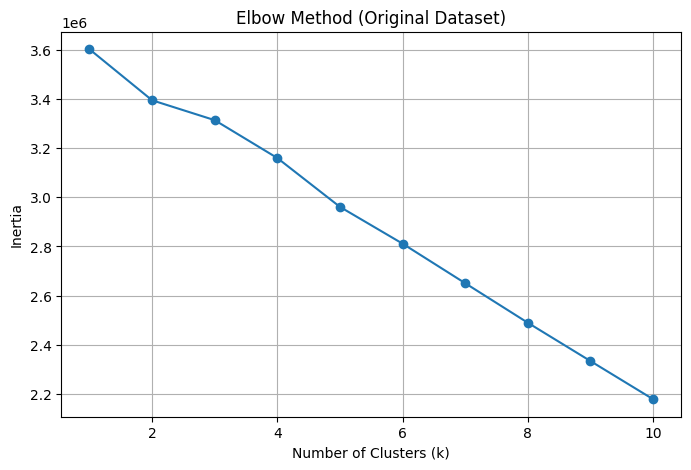

In [52]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run Elbow Method
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method (Original Dataset)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


In [53]:
# Apply KMeans with chosen k (e.g., 4)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df_4['cluster'] = kmeans.fit_predict(X_scaled)

# PCA visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='tab10', s=20)
plt.title("Clustering of Transactions (Original Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

# Optional: Check cluster profiles
print(df.groupby("cluster")[features].mean())

KeyError: 'cluster'

<Figure size 800x500 with 0 Axes>